In [ ]:
import numpy as np
import gymnasium as gym

T = np.array([
        [
            [0.66667, 0.00000, 0.33333, 0.00000, 0.00000],
            [0.33333, 0.33333, 0.33333, 0.00000, 0.00000],
            [0.33333, 0.33333, 0.33333, 0.00000, 0.00000],
            [0.66667, 0.33333, 0.00000, 0.00000, 0.00000]
        ],
        [
            [0.33333, 0.33333, 0.00000, 0.33333, 0.33333],
            [0.33333, 0.33333, 0.00000, 0.33333, 0.33333],
            [0.00000, 0.66667, 0.00000, 0.33333, 0.33333],
            [0.33333, 0.66667, 0.00000, 0.00000, 0.00000]
        ],
        [
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000]
        ],
        [
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000]
        ]
    ] )

actions = ["left", "down", "right", "up"]
reward_index = 4


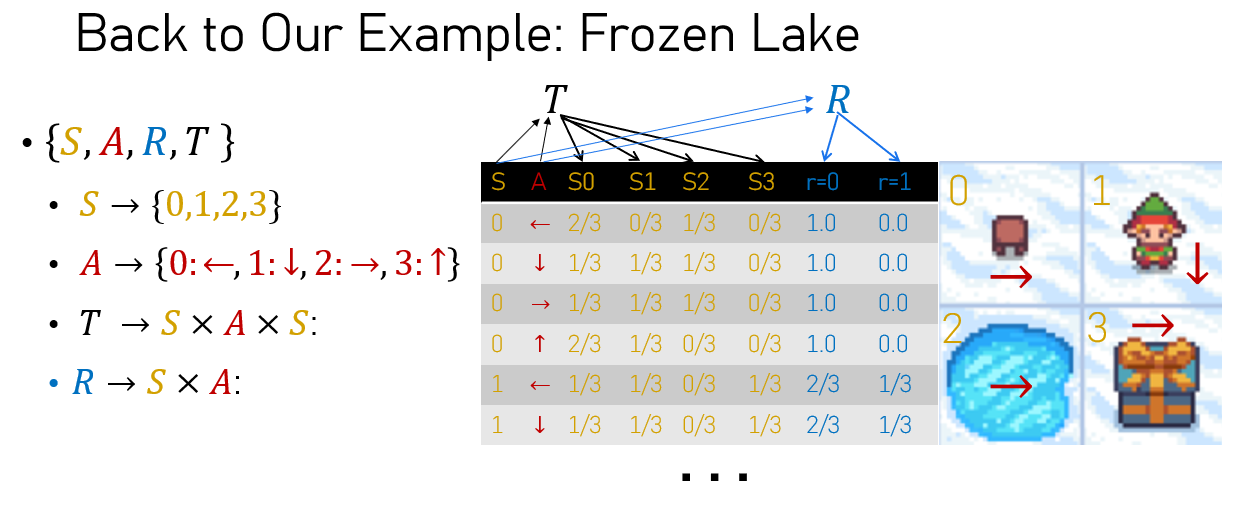

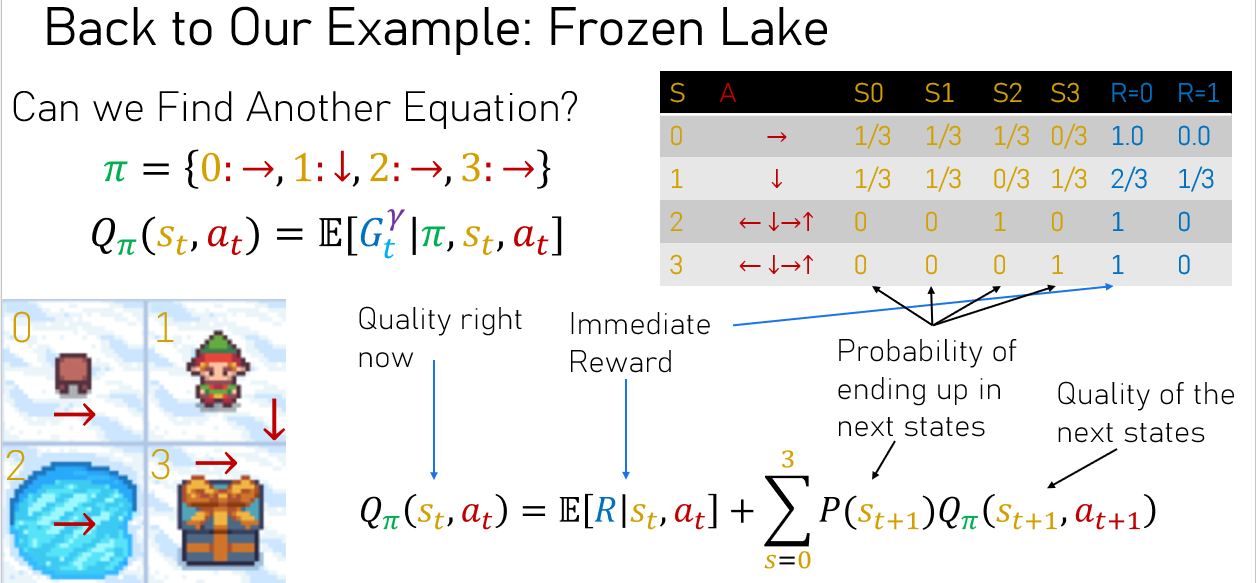

# Back To Where We Left Off In Class

In [ ]:
# We make our policy and Q table and our Q copy for while we are updating the Q
# table.
policy = [2, 1, 2, 2]
Q = np.zeros((4, 4))
Q_copy = np.zeros((4, 4))
actions = ["left", "down", "right", "up"]

# For 10 iterations we refine our estimate of the Q values for this policy
for iteration in range(10):
  print(f"Iteration: {iteration}")
  print(Q)
  q = 0

  for state in range(4):
    action = policy[state]
    reward = T[state,action,reward_index]
    for next_state in range(4):
      next_action = policy[next_state]
      q = q + T[state,action,next_state]*Q[next_state,next_action]
    q=q+reward
    Q_copy[state,action] = q
    q=0

  Q = Q_copy.copy()


Iteration: 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Iteration: 1
[[0.      0.      0.      0.     ]
 [0.      0.33333 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
Iteration: 2
[[0.         0.         0.11110889 0.        ]
 [0.         0.44443889 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 3
[[0.         0.         0.18518074 0.        ]
 [0.         0.51851074 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 4
[[0.         0.         0.23456148 0.        ]
 [0.         0.56789148 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 5
[[0.         0.         0.26748165 0.        ]
 [0.         0.60081165 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.        

# How About the Whole Q_pi

In [ ]:
# How Can We Learn Q Values for the rest of the actions if this is our policy?
policy = [2,1, 2, 2]
Q = np.zeros((4, 4))
Q_copy = np.zeros((4, 4))
#            0       1       2        3
actions = ["left", "down", "right", "up"]
gamma = 1.0
# For 10 iterations we refine our estimate of the Q values for this policy
for iteration in range(10):
  print(f"Iteration: {iteration}")
  print(Q)
  q = 0

  for state in range(4):
    for action in range(4):
      #action = policy[state]
      reward = T[state,action,reward_index]
      for next_state in range(4):
        next_action = policy[next_state]
        q = q + gamma*T[state,action,next_state]*Q[next_state,next_action]
      q=q+reward
      Q_copy[state,action] = q
      q=0

  Q = Q_copy.copy()


#[[0.20920966 0.32031541 0.32031541 0.42492181]
# [0.65364541 0.65364541 0.76476077 0.53603404]

Iteration: 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Iteration: 1
[[0.      0.      0.      0.     ]
 [0.33333 0.33333 0.33333 0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
Iteration: 2
[[0.         0.11110889 0.11110889 0.11110889]
 [0.44443889 0.44443889 0.55555111 0.22222111]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 3
[[0.07407296 0.18518074 0.18518074 0.22221778]
 [0.51851074 0.51851074 0.62962407 0.33333   ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 4
[[0.12345444 0.23456148 0.23456148 0.29628963]
 [0.56789148 0.56789148 0.67900556 0.40740185]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 5
[[0.1563751  0.26748165 0.26748165 0.34567037]
 [0.60081165 0.60081165 0.71192621 0.45678259]
 [0.         0.         0.         0.        ]
 [0.        

# But what if we have no idea what policy is good?

In [ ]:
def greedy_policy(Q, state):
  return np.argmax(Q[state])

def print_policy(Q):
  for state in range(len(Q)):
    act = np.argmax(Q[state])
    print(f"state: {state} action {act}: {actions[act]}")

Q = np.zeros((4, 4))
Q_copy = np.zeros((4, 4))
actions = ["left", "down", "right", "up"]

# For 10 iterations we refine our estimate of the Q values for this policy
for iteration in range(10):
  if iteration % 1 == 0:
    print(f"Iteration: {iteration}")
    print(Q)
    print_policy(Q)

  for state in range(4):
    for action in range(4):
      q = 0
      reward = T[state,action,reward_index]
      for next_state in range(4):
        next_action = greedy_policy(Q,next_state)
        q = q + T[state,action,next_state]*Q[next_state,next_action]
      q=q+reward
      Q_copy[state,action] = q
      q=0

  Q = Q_copy.copy()

Iteration: 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
state: 0 action 0: left
state: 1 action 0: left
state: 2 action 0: left
state: 3 action 0: left
Iteration: 1
[[0.      0.      0.      0.     ]
 [0.33333 0.33333 0.33333 0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
state: 0 action 0: left
state: 1 action 0: left
state: 2 action 0: left
state: 3 action 0: left
Iteration: 2
[[0.         0.11110889 0.11110889 0.11110889]
 [0.44443889 0.44443889 0.55555111 0.22222111]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
state: 0 action 1: down
state: 1 action 2: right
state: 2 action 0: left
state: 3 action 0: left
Iteration: 3
[[0.07407296 0.22221778 0.22221778 0.25925481]
 [0.55554778 0.55554778 0.70369926 0.40740519]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
state: 0 action 3: up
state: 1 action 2: right
state: 2 action 0: left
state: 3

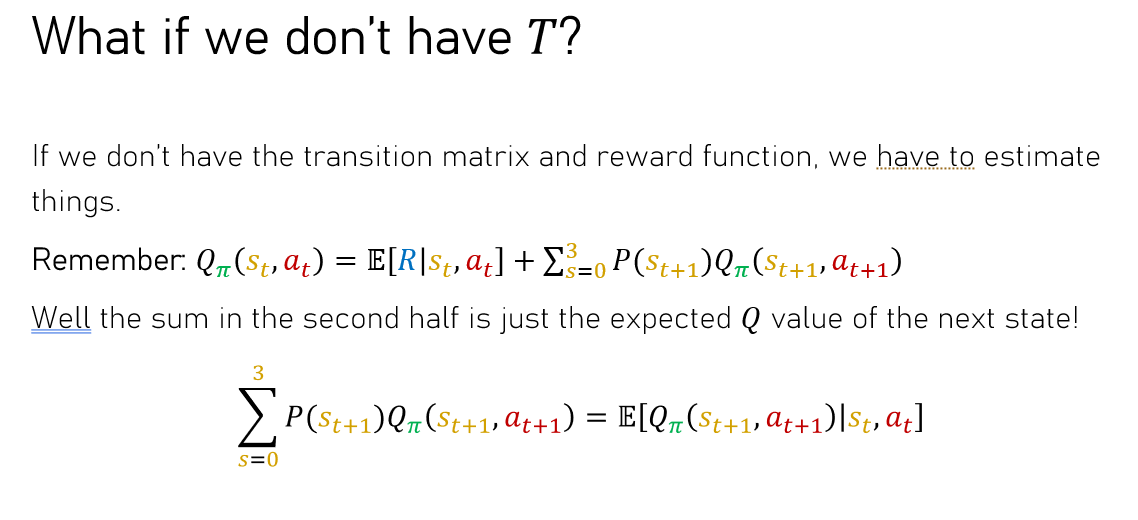



In [ ]:
# We can learn by experience!!

env = gym.make("FrozenLake-v1", desc=["SF", "HG"])
gamma = 0.99
learning_rate = 0.1

# q_new = r + sum: p*q_old

# q_new = learning_rate*(r_observed + q(next_state_observed, next_action))
#       + (1-learning_rate) * q_old

# q_next=10, q=10
# q_next=5, q=9.5
# q_next=5, q = 0.9 *9.5 + 0.1*5

# 0.9*.9*10 + 0.1*.9*5 + 0.1*5







Q = np.zeros((4, 4)) + 5

def greedy_policy(Q, state):
  return np.argmax(Q[state])

def e_greedy_policy(Q,state, epsilon):
  if np.random.rand() < epsilon:
    return np.random.randint(0,len(Q[state]))
  else:
    return np.argmax(Q[state])


def print_policy(Q):
  for state in range(len(Q)):
    act = np.argmax(Q[state])
    print(f"state: {state} action {act}: {actions[act]}")

for iteration in range(1000):
  obs, info = env.reset()
  done = False
  while not done:
    action = e_greedy_policy(Q,obs, epsilon=0.0)
    print(f"obs: {obs}, action: {action}")

    new_obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    print(f"new_obs: {new_obs}")

    Q[obs,action] = ((1-learning_rate)*Q[obs,action] +
                    learning_rate*(reward + int(not done)*gamma*Q[new_obs,greedy_policy(Q,new_obs)]))

    obs = new_obs
    print(Q)


Streaming output truncated to the last 5000 lines.
 [5.         5.         5.         5.        ]
 [5.         5.         5.         5.        ]]
obs: 0, action: 3
new_obs: 0
[[0.90815488 0.8983386  0.91355525 0.95053344]
 [0.95110638 0.9531608  0.97757674 0.95318031]
 [5.         5.         5.         5.        ]
 [5.         5.         5.         5.        ]]
obs: 0, action: 3
new_obs: 0
[[0.90815488 0.8983386  0.91355525 0.94958291]
 [0.95110638 0.9531608  0.97757674 0.95318031]
 [5.         5.         5.         5.        ]
 [5.         5.         5.         5.        ]]
obs: 0, action: 3
new_obs: 1
[[0.90815488 0.8983386  0.91355525 0.95140472]
 [0.95110638 0.9531608  0.97757674 0.95318031]
 [5.         5.         5.         5.        ]
 [5.         5.         5.         5.        ]]
obs: 1, action: 2
new_obs: 3
[[0.90815488 0.8983386  0.91355525 0.95140472]
 [0.95110638 0.9531608  0.97981907 0.95318031]
 [5.         5.         5.         5.        ]
 [5.         5.         5.    

# Why does that only work sometimes?

In [ ]:
env = gym.make("FrozenLake-v1", render_mode="human", desc=["SF", "HG"])
obs, info = env.reset()
gamma = 1.0
learning_rate = 0.1
Q = np.zeros((4, 4))
Q_copy = np.zeros((4, 4))

def e_greedy_policy(Q, state, epsilon):
  r = np.random.random()
  if r < epsilon:
    return np.random.randint(0,len(Q[state]))
  else:
    return np.argmax(Q[state])

def print_policy(Q):
  for state in range(len(Q)):
    act = np.argmax(Q[state])
    print(f"state: {state} action {act}{actions[act]}")


#What about when the table gets too big?

In [ ]:
env = gym.make("CartPole-v1")
obs, info = env.reset()
gamma = 0.99
learning_rate = 0.01
Q = np.zeros((2**4, 2))
Q_copy = np.zeros((2**4, 2))

def obs_to_discrete(obs):
  disc = 0
  for i in range(len(obs)):
    disc += int(obs[i]>0)*(2**(i))
  return disc


def e_greedy_policy(Q, state, epsilon):
  r = np.random.random()
  if r < epsilon:
    return np.random.randint(0,2)
  else:
    return np.argmax(Q[state])

def print_policy(Q):
  for state in range(len(Q)):
    act = np.argmax(Q[state])
    print(f"state: {state} action {act}{actions[act]}")


reward_hist = []
reward_sum = 0
for n_iter in range(20000):
  print(reward_sum)
  #print(Q)
  #input(f"go again? {reward_sum}")
  obs, info = env.reset()
  done = False
  reward_sum = 0

  while not done:

    state = obs_to_discrete(obs)
    action = e_greedy_policy(Q,state,0.1) # 100/(n_iter+1)
    new_obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    reward_sum += reward

    new_state = obs_to_discrete(new_obs)

    q_new = reward + int(not done)*gamma*np.max(Q[new_state])
    q_old = Q[state,action]
    Q[state,action] = (1-learning_rate)*q_old + learning_rate*(q_new)

    obs = new_obs

  reward_hist.append(reward_sum)




Streaming output truncated to the last 5000 lines.
182.0
50.0
38.0
45.0
129.0
199.0
217.0
176.0
31.0
164.0
40.0
91.0
78.0
192.0
175.0
18.0
180.0
170.0
28.0
87.0
40.0
62.0
138.0
187.0
36.0
32.0
183.0
61.0
66.0
83.0
28.0
59.0
42.0
151.0
187.0
61.0
35.0
168.0
41.0
39.0
102.0
186.0
179.0
226.0
54.0
121.0
73.0
87.0
147.0
154.0
162.0
154.0
186.0
130.0
153.0
56.0
24.0
144.0
182.0
172.0
164.0
71.0
160.0
126.0
35.0
48.0
55.0
44.0
15.0
78.0
133.0
74.0
39.0
138.0
57.0
63.0
28.0
127.0
83.0
71.0
36.0
47.0
37.0
46.0
197.0
179.0
135.0
49.0
138.0
49.0
162.0
150.0
163.0
27.0
40.0
23.0
28.0
36.0
40.0
27.0
60.0
47.0
40.0
67.0
154.0
66.0
39.0
43.0
43.0
200.0
29.0
151.0
69.0
200.0
167.0
51.0
97.0
205.0
174.0
121.0
207.0
81.0
68.0
201.0
167.0
53.0
220.0
140.0
48.0
47.0
34.0
54.0
173.0
179.0
159.0
62.0
64.0
77.0
11.0
25.0
139.0
139.0
99.0
37.0
11.0
186.0
26.0
61.0
37.0
53.0
40.0
181.0
12.0
10.0
156.0
25.0
171.0
23.0
196.0
28.0
10.0
9.0
176.0
44.0
139.0
152.0
197.0
200.0
155.0
124.0
39.0
185.0
62.0
69.0
27.0


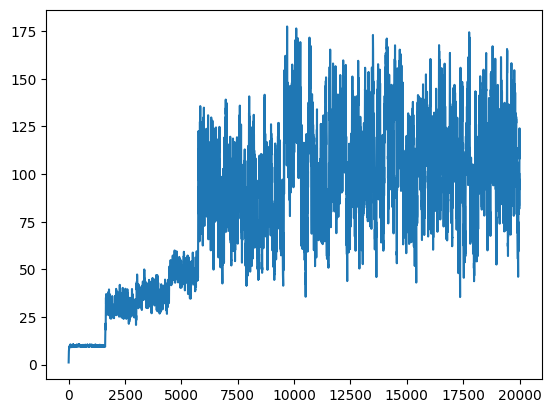

In [ ]:
import matplotlib.pyplot as plt

lpsmooth = []
last = 0
for r in reward_hist:
  lpsmooth.append(0.9*last+0.1*r)
  last = lpsmooth[-1]
plt.plot(lpsmooth)
plt.show()

# A Better Approximator, The Artificial Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
our_matrix_one = np.array([[1.0,2,3],[6,7,8]]) # python list form, a 2x3 matrix
our_matrix_two = np.array([[1],[2],[3.0]]) # python list form, a 2x3 matrix
our_data = np.array([[-1.0,-1],[-1,1],[1,-1],[1,1]]) # four coordinates
our_targets = np.array([0.0,1,1,0])

print(f"Our Matrix one: ")
print(our_matrix_one)
print(f"Our Matrix two: ")
print(our_matrix_two)
print(f"Our data: ")
print(our_data)
print(f"Our targets: ")
print(our_targets)


In [ ]:
#matmul

In [ ]:
#torch and learn

In [ ]:


class Q_network(nn.Module):
    def __init__(
        self,
        obs_dim,
        discrete_action_dim,
        hidden_dim=32,
        device="cpu",
    ):
        super(Q_network, self).__init__()
        self.device = device
        self.l1 = nn.Linear(obs_dim, hidden_dim)
        self.l2 = nn.Linear(hidden_dim, hidden_dim)
        self.l3 = nn.Linear(hidden_dim, discrete_action_dim)
        self.to(device)

    def forward(self, obs):
        x = F.relu(self.l1(obs))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x


In [ ]:
env = gym.make("CartPole-v1")
obs, info = env.reset()
gamma = 0.99
learning_rate = 0.01
Q = np.zeros((2**4, 2))
Q_copy = np.zeros((2**4, 2))

def obs_to_discrete(obs):
  disc = 0
  for i in range(len(obs)):
    disc += int(obs[i]>0)*(2**(i))
  return disc


def e_greedy_policy(Q, state, epsilon):
  r = np.random.random()
  if r < epsilon:
    return np.random.randint(0,2
                             )
  else:
    return np.argmax(Q[state])

def print_policy(Q):
  for state in range(len(Q)):
    act = np.argmax(Q[state])
    print(f"state: {state} action {act}{actions[act]}")


reward_hist = []
reward_sum = 0
for n_iter in range(5000):
  print(reward_sum)
  #print(Q)
  #input(f"go again? {reward_sum}")
  obs, info = env.reset()
  done = False
  reward_sum = 0

  while not done:

    state = obs_to_discrete(obs)
    action = e_greedy_policy(Q,state,0.1) # 100/(n_iter+1)
    new_obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    reward_sum += reward

    new_state = obs_to_discrete(new_obs)

    q_new = reward + int(not done)*gamma*np.max(Q[new_state])
    q_old = Q[state,action]
    Q[state,action] = (1-learning_rate)*q_old + learning_rate*(q_new)

    obs = new_obs

  reward_hist.append(reward_sum)


